# oshamoji

In [1]:
import os
import sys
import time
import matplotlib.pyplot as plt
import numpy as np

import cv2

from detectron.utils.io import cache_url
from detectron.core.config import assert_and_infer_cfg
from detectron.core.config import cfg
from detectron.core.config import merge_cfg_from_file
import detectron.core.test_engine as infer_engine
import detectron.utils.vis as vis_utils
import pycocotools.mask as mask_util
import detectron.datasets.dummy_datasets as dummy_datasets
import detectron.utils.c2 as c2_utils

from utils.image import disp_image

c2_utils.import_detectron_ops()
cv2.ocl.setUseOpenCL(False)

%matplotlib inline

Found Detectron ops lib: /usr/local/caffe2_build/lib/libcaffe2_detectron_ops_gpu.so


/detectron/detectron/utils/env.py:47: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/ioloop.py

## Detect

In [2]:
# Load model
cfg_path = os.path.join('/detectron', 'configs', '12_2017_baselines/e2e_mask_rcnn_R-101-FPN_2x.yaml')
merge_cfg_from_file(cfg_path)

cfg.NUM_GPUS = 1

model_url = 'https://dl.fbaipublicfiles.com/detectron/35861858/12_2017_baselines/e2e_mask_rcnn_R-101-FPN_2x.yaml.02_32_51.SgT4y1cO/output/train/coco_2014_train%3Acoco_2014_valminusminival/generalized_rcnn/model_final.pkl'
weights = cache_url(model_url, cfg.DOWNLOAD_CACHE)

assert_and_infer_cfg(cache_urls=False)

assert not cfg.MODEL.RPN_ONLY, \
    'RPN models are not supported'
assert not cfg.TEST.PRECOMPUTED_PROPOSALS, \
    'Models that require precomputed proposals are not supported'

model = infer_engine.initialize_model_from_cfg(weights)

INFO:detectron.utils.net:Loading weights from: /tmp/detectron-download-cache/35861858/12_2017_baselines/e2e_mask_rcnn_R-101-FPN_2x.yaml.02_32_51.SgT4y1cO/output/train/coco_2014_train%3Acoco_2014_valminusminival/generalized_rcnn/model_final.pkl
INFO:detectron.utils.net:conv1_w loaded from weights file into gpu_0/conv1_w: (64, 3, 7, 7)
INFO:detectron.utils.net:res_conv1_bn_s loaded from weights file into gpu_0/res_conv1_bn_s: (64,)
INFO:detectron.utils.net:res_conv1_bn_b loaded from weights file into gpu_0/res_conv1_bn_b: (64,)
INFO:detectron.utils.net:res2_0_branch2a_w loaded from weights file into gpu_0/res2_0_branch2a_w: (64, 64, 1, 1)
INFO:detectron.utils.net:res2_0_branch2a_bn_s loaded from weights file into gpu_0/res2_0_branch2a_bn_s: (64,)
INFO:detectron.utils.net:res2_0_branch2a_bn_b loaded from weights file into gpu_0/res2_0_branch2a_bn_b: (64,)
INFO:detectron.utils.net:res2_0_branch2b_w loaded from weights file into gpu_0/res2_0_branch2b_w: (64, 64, 3, 3)
INFO:detectron.utils.n

INFO:detectron.utils.net:res3_3_branch2b_bn_b loaded from weights file into gpu_0/res3_3_branch2b_bn_b: (128,)
INFO:detectron.utils.net:res3_3_branch2c_w [+ momentum] loaded from weights file into gpu_0/res3_3_branch2c_w: (512, 128, 1, 1)
INFO:detectron.utils.net:res3_3_branch2c_bn_s loaded from weights file into gpu_0/res3_3_branch2c_bn_s: (512,)
INFO:detectron.utils.net:res3_3_branch2c_bn_b loaded from weights file into gpu_0/res3_3_branch2c_bn_b: (512,)
INFO:detectron.utils.net:res4_0_branch2a_w [+ momentum] loaded from weights file into gpu_0/res4_0_branch2a_w: (256, 512, 1, 1)
INFO:detectron.utils.net:res4_0_branch2a_bn_s loaded from weights file into gpu_0/res4_0_branch2a_bn_s: (256,)
INFO:detectron.utils.net:res4_0_branch2a_bn_b loaded from weights file into gpu_0/res4_0_branch2a_bn_b: (256,)
INFO:detectron.utils.net:res4_0_branch2b_w [+ momentum] loaded from weights file into gpu_0/res4_0_branch2b_w: (256, 256, 3, 3)
INFO:detectron.utils.net:res4_0_branch2b_bn_s loaded from wei

INFO:detectron.utils.net:res4_7_branch2a_bn_s loaded from weights file into gpu_0/res4_7_branch2a_bn_s: (256,)
INFO:detectron.utils.net:res4_7_branch2a_bn_b loaded from weights file into gpu_0/res4_7_branch2a_bn_b: (256,)
INFO:detectron.utils.net:res4_7_branch2b_w [+ momentum] loaded from weights file into gpu_0/res4_7_branch2b_w: (256, 256, 3, 3)
INFO:detectron.utils.net:res4_7_branch2b_bn_s loaded from weights file into gpu_0/res4_7_branch2b_bn_s: (256,)
INFO:detectron.utils.net:res4_7_branch2b_bn_b loaded from weights file into gpu_0/res4_7_branch2b_bn_b: (256,)
INFO:detectron.utils.net:res4_7_branch2c_w [+ momentum] loaded from weights file into gpu_0/res4_7_branch2c_w: (1024, 256, 1, 1)
INFO:detectron.utils.net:res4_7_branch2c_bn_s loaded from weights file into gpu_0/res4_7_branch2c_bn_s: (1024,)
INFO:detectron.utils.net:res4_7_branch2c_bn_b loaded from weights file into gpu_0/res4_7_branch2c_bn_b: (1024,)
INFO:detectron.utils.net:res4_8_branch2a_w [+ momentum] loaded from weights

INFO:detectron.utils.net:res4_14_branch2c_bn_b loaded from weights file into gpu_0/res4_14_branch2c_bn_b: (1024,)
INFO:detectron.utils.net:res4_15_branch2a_w [+ momentum] loaded from weights file into gpu_0/res4_15_branch2a_w: (256, 1024, 1, 1)
INFO:detectron.utils.net:res4_15_branch2a_bn_s loaded from weights file into gpu_0/res4_15_branch2a_bn_s: (256,)
INFO:detectron.utils.net:res4_15_branch2a_bn_b loaded from weights file into gpu_0/res4_15_branch2a_bn_b: (256,)
INFO:detectron.utils.net:res4_15_branch2b_w [+ momentum] loaded from weights file into gpu_0/res4_15_branch2b_w: (256, 256, 3, 3)
INFO:detectron.utils.net:res4_15_branch2b_bn_s loaded from weights file into gpu_0/res4_15_branch2b_bn_s: (256,)
INFO:detectron.utils.net:res4_15_branch2b_bn_b loaded from weights file into gpu_0/res4_15_branch2b_bn_b: (256,)
INFO:detectron.utils.net:res4_15_branch2c_w [+ momentum] loaded from weights file into gpu_0/res4_15_branch2c_w: (1024, 256, 1, 1)
INFO:detectron.utils.net:res4_15_branch2c_

INFO:detectron.utils.net:res4_22_branch2b_bn_b loaded from weights file into gpu_0/res4_22_branch2b_bn_b: (256,)
INFO:detectron.utils.net:res4_22_branch2c_w [+ momentum] loaded from weights file into gpu_0/res4_22_branch2c_w: (1024, 256, 1, 1)
INFO:detectron.utils.net:res4_22_branch2c_bn_s loaded from weights file into gpu_0/res4_22_branch2c_bn_s: (1024,)
INFO:detectron.utils.net:res4_22_branch2c_bn_b loaded from weights file into gpu_0/res4_22_branch2c_bn_b: (1024,)
INFO:detectron.utils.net:res5_0_branch2a_w [+ momentum] loaded from weights file into gpu_0/res5_0_branch2a_w: (512, 1024, 1, 1)
INFO:detectron.utils.net:res5_0_branch2a_bn_s loaded from weights file into gpu_0/res5_0_branch2a_bn_s: (512,)
INFO:detectron.utils.net:res5_0_branch2a_bn_b loaded from weights file into gpu_0/res5_0_branch2a_bn_b: (512,)
INFO:detectron.utils.net:res5_0_branch2b_w [+ momentum] loaded from weights file into gpu_0/res5_0_branch2b_w: (512, 512, 3, 3)
INFO:detectron.utils.net:res5_0_branch2b_bn_s loa

INFO:detectron.utils.net:_[mask]_fcn3_b [+ momentum] loaded from weights file into gpu_0/_[mask]_fcn3_b: (256,)
INFO:detectron.utils.net:_[mask]_fcn4_w [+ momentum] loaded from weights file into gpu_0/_[mask]_fcn4_w: (256, 256, 3, 3)
INFO:detectron.utils.net:_[mask]_fcn4_b [+ momentum] loaded from weights file into gpu_0/_[mask]_fcn4_b: (256,)
INFO:detectron.utils.net:conv5_mask_w [+ momentum] loaded from weights file into gpu_0/conv5_mask_w: (256, 256, 2, 2)
INFO:detectron.utils.net:conv5_mask_b [+ momentum] loaded from weights file into gpu_0/conv5_mask_b: (256,)
INFO:detectron.utils.net:mask_fcn_logits_w [+ momentum] loaded from weights file into gpu_0/mask_fcn_logits_w: (81, 256, 1, 1)
INFO:detectron.utils.net:mask_fcn_logits_b [+ momentum] loaded from weights file into gpu_0/mask_fcn_logits_b: (81,)
INFO:detectron.utils.net:res4_16_branch2a_b preserved in workspace (unused)
INFO:detectron.utils.net:res5_1_branch2b_b preserved in workspace (unused)
INFO:detectron.utils.net:res4_16_

INFO:detectron.utils.net:res3_1_branch2a_b preserved in workspace (unused)
INFO:detectron.utils.net:res4_8_branch2a_b preserved in workspace (unused)
INFO:detectron.utils.net:res3_3_branch2b_b preserved in workspace (unused)
INFO:detectron.utils.net:res4_1_branch2b_b preserved in workspace (unused)
INFO:detectron.utils.net:res4_3_branch2a_b preserved in workspace (unused)
INFO:detectron.utils.net:res4_17_branch2b_b preserved in workspace (unused)
INFO:detectron.utils.net:res4_3_branch2c_b preserved in workspace (unused)


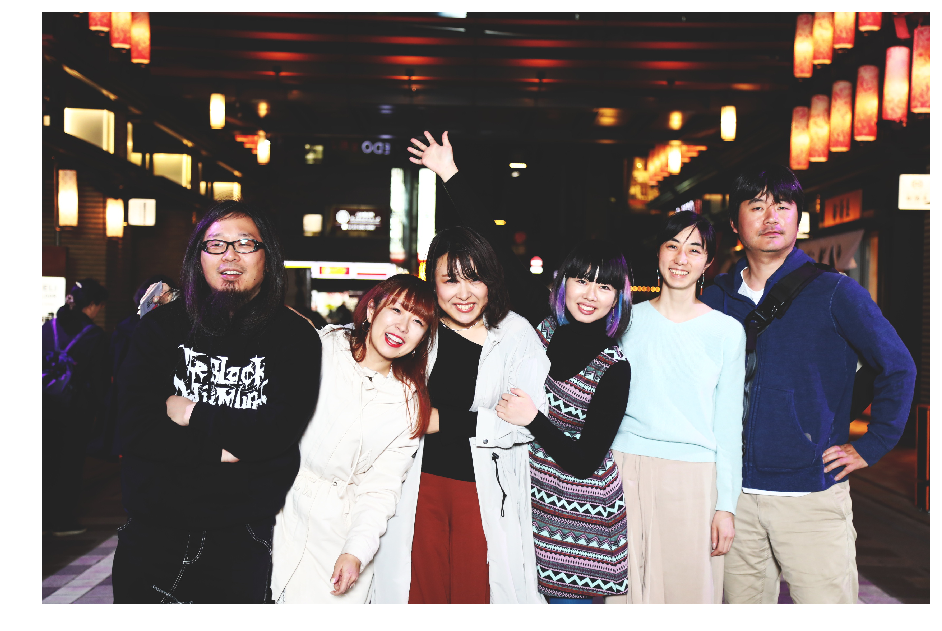

In [3]:
# Load image

image = cv2.imread('images/bascule.jpg')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

disp_image(image)

In [4]:
# Detect

with c2_utils.NamedCudaScope(0):
    cls_boxes, cls_segms, cls_keyps = infer_engine.im_detect_all(
        model, image, None
    )
boxes, segms, _, classes = vis_utils.convert_from_cls_format(
    cls_boxes, cls_segms, cls_keyps)
masks = mask_util.decode(segms)

In [5]:
# Get classes

dummy_coco_dataset = dummy_datasets.get_coco_dataset()
class_map = {v:k for k,v in dummy_coco_dataset.classes.items()}
class_map['person']

1

In [6]:
def list_on_indices(list, indices):
    return [list[i] for i in indices]

def filter_by_thresh(classes, masks, boxes, thresh):
    idxs = []
    for idx, box in enumerate(boxes):
        score = box[-1]
        if score >= thresh:
            idxs.append(idx)
        
    return list_on_indices(classes, idxs), masks[:, :, idxs], boxes[idxs]

def filter_by_class(classes, masks, boxes, target_classes):
    idxs = []
    for idx, cls in enumerate(classes):
        if cls in target_classes:
            idxs.append(idx)
        
    return list_on_indices(classes, idxs), masks[:, :, idxs], boxes[idxs]

def filter_person_masks(classes, masks, boxes, thresh):
    p_classes, p_masks, p_boxes = filter_by_thresh(classes, masks, boxes, thresh)
    if len(p_classes) > 0:
        
        p_classes, p_masks, p_boxes = filter_by_class(p_classes, p_masks, p_boxes, [class_map['person']])

    return p_classes, p_masks, p_boxes

In [7]:
# select person masks

thresh = 0.9
_, person_masks, person_boxes = filter_person_masks(classes, masks, boxes, thresh)
N = person_masks.shape[-1]
N

7

In [8]:
# Merge mask

mask = np.full(person_masks[:, :, 0].shape, False)
for i in range(N):
    mask = np.logical_or(mask, person_masks[:, :, i])

## Drawing

In [9]:
from wand.image import Image
from wand.drawing import Drawing
from wand.color import Color

In [38]:
height, width, _ = image.shape

font_size = 880
kerning = -50
font =  os.path.join('font', 'NotoSerifCJKjp-Bold.otf')

text = 'Bascule'

mask_pos = np.where(mask == True)
top = np.min(mask_pos[0])

In [39]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
r, enc = cv2.imencode(".jpg", image_rgb)
org_img = Image(blob=enc.tostring())

txt_img = Image(width=width, height=height)

with Drawing() as draw:
    draw.stroke_color = Color('white')
    draw.fill_color = Color('white')
    
    draw.font = font

    draw.font_size = font_size
    draw.text_kerning = kerning

    metrics = draw.get_font_metrics(txt_img, text, False)
    text_height = metrics.y2 - metrics.y1
    text_y = int(top + text_height * 0.3)
    text_y = max(text_y, int(text_height))

    offset_left = (width - metrics.x) / 2
    draw.text(int(offset_left), text_y, text)
    draw.draw(txt_img)

In [40]:
def apply_mask(image, mask_img, invert=False):
    image.alpha_channel = True
    if invert:
        mask_img.negate()
    with Image(width=image.width, height=image.height, background=Color("transparent")) as alpha_image:
        alpha_image.composite_channel(
            "alpha",
            mask_img,
            "copy_opacity",
            0, 0)
        image.composite_channel(
            "alpha",
            alpha_image,
            "multiply",
            0, 0)

In [41]:
mask_img_buf = np.full((height, width, 4), 255)
mask_img_buf[:, :, 3] = np.where(mask == True,
    255,
    0)
r, enc = cv2.imencode(".png", mask_img_buf)
mask_img = Image(blob=enc.tostring())

masked_img = org_img.clone()
apply_mask(masked_img, mask_img)

mask_img.close()

texted_img = org_img.clone()
texted_img.composite(image=txt_img, left=0, top=0)
texted_img.composite(image=masked_img, left=0, top=0)

In [42]:
import cStringIO

def wand_to_cv(image):
    image.format = 'jpeg'
    image.compression_quality = 90
    buf = np.asarray(bytearray(image.make_blob()), dtype=np.uint8)
    return cv2.imdecode(buf, cv2.IMREAD_UNCHANGED)

In [43]:
img = wand_to_cv(texted_img)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img.shape

(2240, 3360, 3)

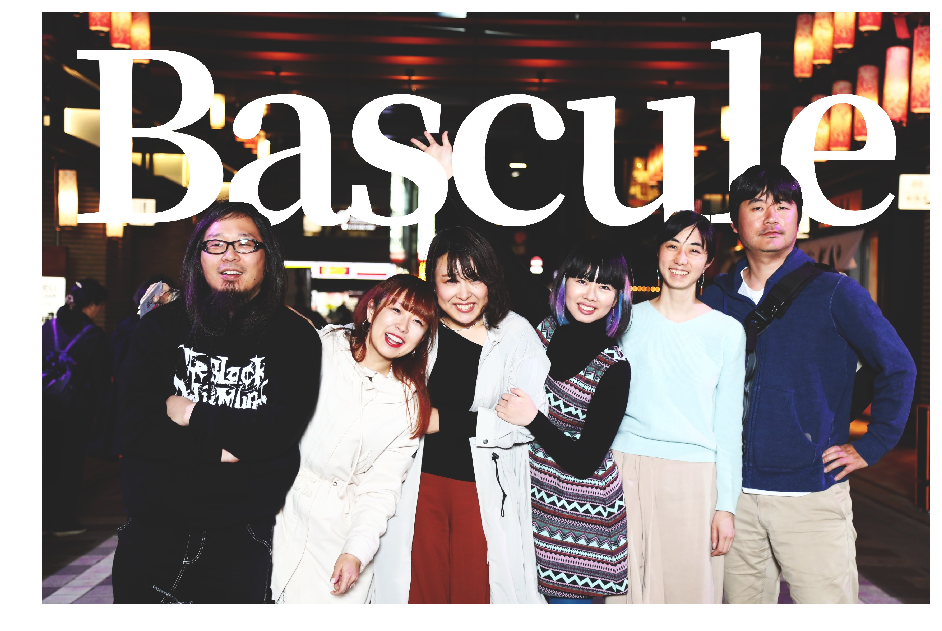

In [44]:
disp_image(img)